In [29]:
from neo import io
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
def read_abf(filename, groupby=False):
    """
    Imports ABF file using neo io AxonIO, breaks it down by blocks 
    which are then processed into a multidimensional pandas dataframe 
    where each block corresponds to a sweep and columns represent time
    and each recorded channel. Channel names can be changed later if 
    necessary.
    
    Returned dataframe is NOT grouped by the sweep by default, but can
    be overriden by groupby=True.
    
    Not sure if default time is in seconds or not (need to check).
    
    More documentation necessary.
    """
    
    r = io.AxonIO(filename = filename)
    bl = r.read_block(lazy=False, cascade=True)
    num_channels = len(bl.segments[0].analogsignals)
    df_list = []
    channels = []
    signals = []
    sweep_list = []

    for seg_num, seg in enumerate(bl.segments):
        for i in range(num_channels):
            channels.append('channel_' + str(i))
            signals.append(bl.segments[seg_num].analogsignals[i])
        data_dict = dict(zip(channels, signals))
        time = seg.analogsignals[0].times - seg.analogsignals[0].times[0]
        data_dict['time'] = time
        df = pd.DataFrame(data_dict)
        df_list.append(df)
        sweep_list.append('sweep' + str(seg_num + 1).zfill(3))
        
    if groupby:
        return pd.concat(df_list, keys=sweep_list, 
            names=['sweep']).groupby(level='sweep')
    else: 
        return pd.concat(df_list, keys=sweep_list, 
            names=['sweep'])

## Insert your filepath in the cell below and run it

In [31]:
df = read_abf('/Users/chadestep/My_Stuff/python/example_data/abf_files/2015_02_25_0003.abf')
type(df)

pandas.core.frame.DataFrame

## Pandas creates a spreadsheet-like, 2D, labeled data structure.

In [32]:
df

channel_0  channel_1     time
sweep                                         
sweep001 0      -60.302731   0.003601   0.0000
         1      -60.302731   0.003601   0.0001
         2      -60.302731   0.003479   0.0002
         3      -60.241695   0.003479   0.0003
         4      -60.241695   0.003479   0.0004
         5      -60.241695   0.003601   0.0005
         6      -60.302731   0.003662   0.0006
         7      -60.363766   0.003723   0.0007
         8      -60.363766   0.003723   0.0008
         9      -60.302731   0.003662   0.0009
         10     -60.241695   0.003601   0.0010
         11     -60.241695   0.003601   0.0011
         12     -60.241695   0.003662   0.0012
         13     -60.241695   0.003723   0.0013
         14     -60.302731   0.003784   0.0014
         15     -60.302731   0.003784   0.0015
         16     -60.241695   0.003723   0.0016
         17     -60.180660   0.003601   0.0017
         18     -60.119625   0.003601   0.0018
         19     -60.119625   0.003601   0.0019
         20     -60.180660   0.003662   0.0020
         21     -60.302731   0.003723   0.0021
         22     -60.363766   0.003662   0.0022
         23     -60.363766   0.003662   0.0023
         24     -60.363766   0.003601   0.0024
         25     -60.363766   0.003601   0.0025
         26     -60.302731   0.003601   0.0026
         27     -60.302731   0.003662   0.0027
         28     -60.363766   0.003723   0.0028
         29     -60.363766   0.003784   0.0029
...                    ...        ...      ...
sweep005 699970 -48.828121   0.003601  69.9970
         699971 -48.828121   0.003662  69.9971
         699972 -48.828121   0.003662  69.9972
         699973 -48.828121   0.003601  69.9973
         699974 -48.828121   0.003540  69.9974
         699975 -48.828121   0.003479  69.9975
         699976 -48.828121   0.003479  69.9976
         699977 -48.767086   0.003479  69.9977
         699978 -48.767086   0.003479  69.9978
         699979 -48.767086   0.003479  69.9979
         699980 -48.767086   0.003479  69.9980
         699981 -48.767086   0.003479  69.9981
         699982 -48.767086   0.003479  69.9982
         699983 -48.767086   0.003418  69.9983
         699984 -48.828121   0.003418  69.9984
         699985 -48.889156   0.003479  69.9985
         699986 -48.889156   0.003601  69.9986
         699987 -48.889156   0.003601  69.9987
         699988 -48.828121   0.003662  69.9988
         699989 -48.767086   0.003601  69.9989
         699990 -48.767086   0.003540  69.9990
         699991 -48.767086   0.003540  69.9991
         699992 -48.828121   0.003601  69.9992
         699993 -48.828121   0.003662  69.9993
         699994 -48.889156   0.003662  69.9994
         699995 -48.950191   0.003662  69.9995
         699996 -48.950191   0.003601  69.9996
         699997 -48.950191   0.003540  69.9997
         699998 -48.950191   0.003540  69.9998
         699999 -49.072262   0.003601  69.9999

[3500000 rows x 3 columns]

## Let's just plot all the sweeps to see what it looks like

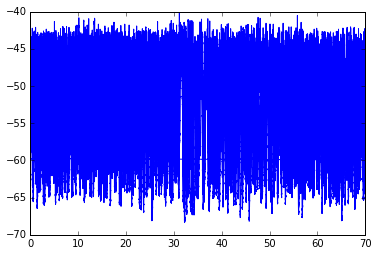

In [34]:
plt.plot(df['time'], 
         df['channel_0'])

# plt.plot(df['time'], df['channel_0'])

# plt.plot(df.time, 
#          df.channel_0)

## I can't see anything, let's make the plot bigger

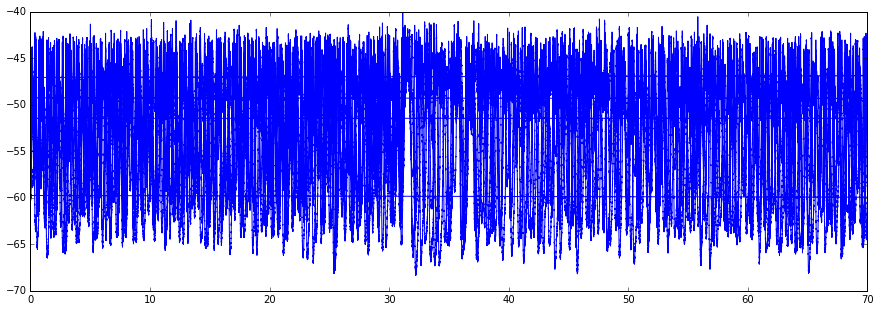

In [35]:
plt.figure(figsize=(15,5))
plt.plot(df['time'], 
         df['channel_0'])

## The fuck are those lines? What about just the first sweep?

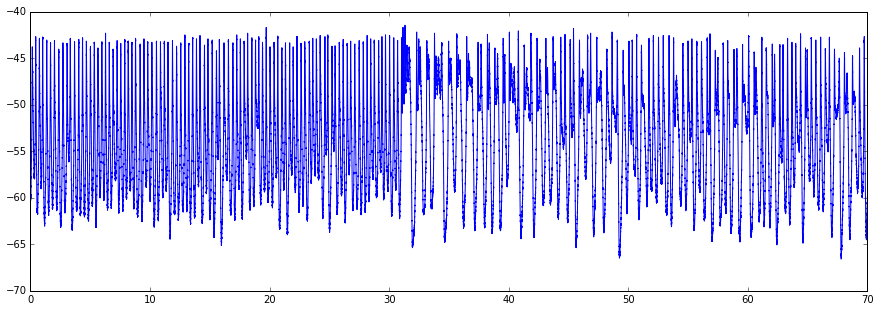

In [36]:
plt.figure(figsize=(15,5))
plt.plot(df.ix['sweep001']['time'], 
         df.ix['sweep001']['channel_0'])

# plt.plot(df.ix['sweep001'].time, 
#          df.ix['sweep001'].channel_0)

## Why's it all spotty and ugly? Also, I hate blue, so let's change that and add some labels

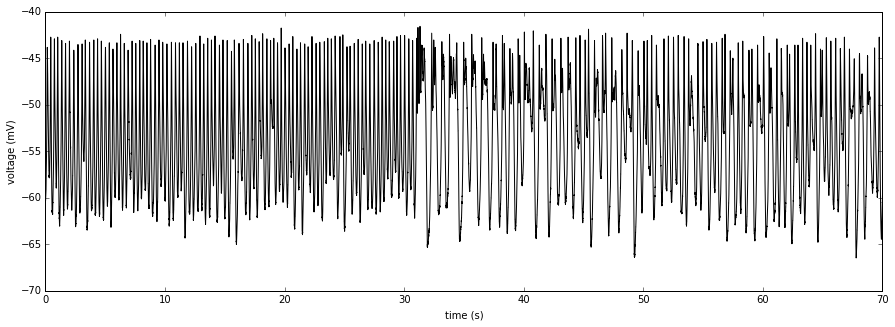

In [37]:
plt.figure(figsize=(15,5))
# donwsample 20-fold. Went from 10KHz down to 500Hz
plt.plot(df.ix['sweep001']['time'][::20], 
         df.ix['sweep001']['channel_0'][::20], 
         color='black')
plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.show()

## I only care about a subset of that plot, so let's just plot that

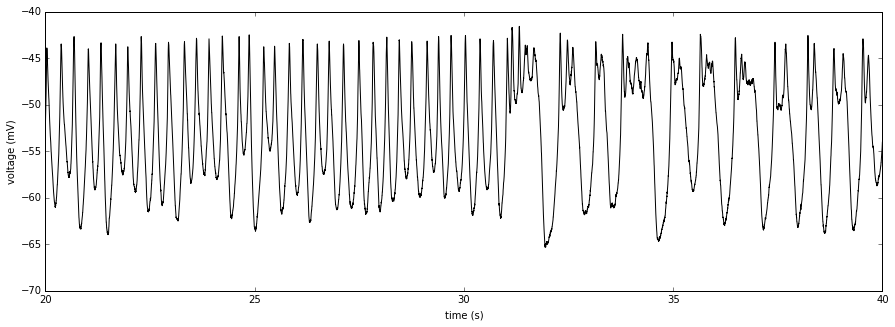

In [38]:
plt.figure(figsize=(15,5))
plt.plot(df.ix['sweep001']['time'][200000:400000:20], 
         df.ix['sweep001']['channel_0'][200000:400000:20], 
         color='black')
plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.show()

# Making better figures: flexibility

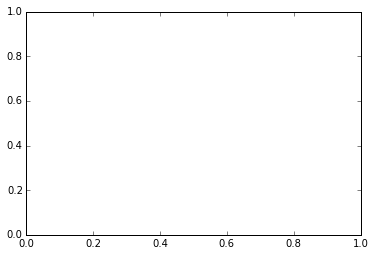

In [39]:
# plt.subplots function is going to RETURN two things: f and ax
# f is the figure
# ax are the individual subplots

f, ax = plt.subplots(1)

plt.show()

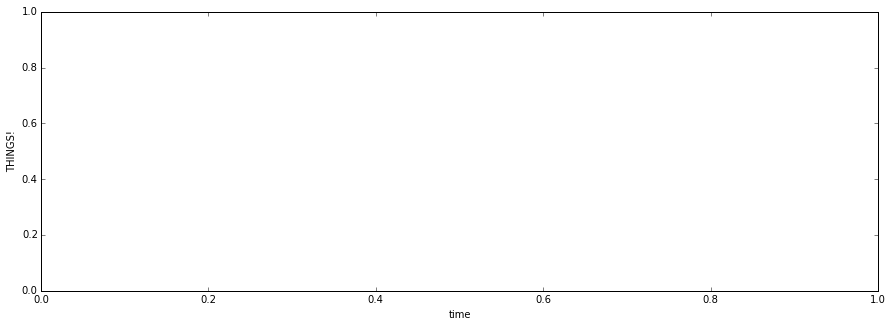

In [40]:
# plt.figure(figsize=(15,5))
f, ax = plt.subplots(1, figsize=(15,5))
ax.set_xlabel('time')
ax.set_ylabel('THINGS!')
plt.show()

## What about more complicated plots?

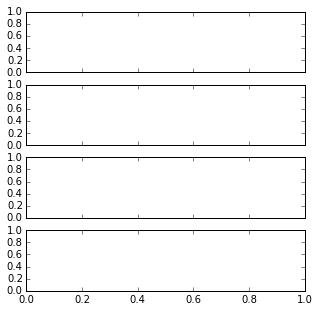

In [41]:
f, ax = plt.subplots(4, sharex=True, sharey=True, figsize=(5,5))
# so let's just run this with no other inputs and see what happens

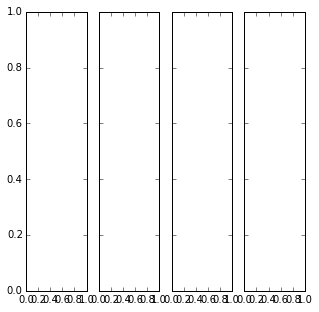

In [42]:
f, ax = plt.subplots(1,4, sharex=True, sharey=True, figsize=(5,5))

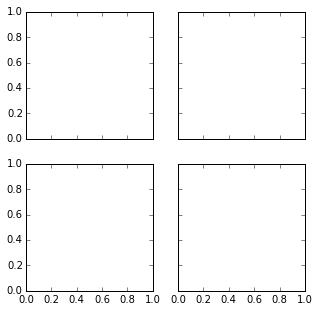

In [43]:
f, ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(5,5))

## Okay, now we're getting somewhere, but we can do much better. What about plotting the first 4 sweeps in a more logical fashion?

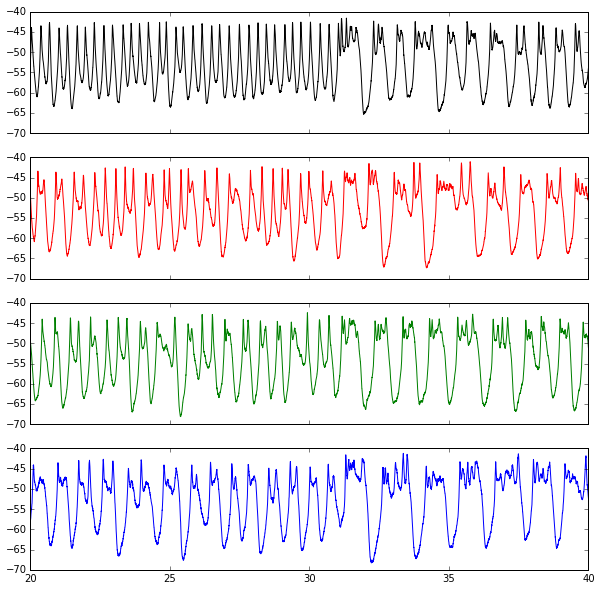

In [44]:
f, ax = plt.subplots(4, sharex=True, sharey=True, figsize=(10,10))
ax[0].plot(df.ix['sweep001']['time'][200000:400000:20], 
           df.ix['sweep001']['channel_0'][200000:400000:20], 
           color='black')
ax[1].plot(df.ix['sweep002']['time'][200000:400000:20], 
           df.ix['sweep002']['channel_0'][200000:400000:20], 
           color='red')
ax[2].plot(df.ix['sweep003']['time'][200000:400000:20], 
           df.ix['sweep003']['channel_0'][200000:400000:20], 
           color='green')
ax[3].plot(df.ix['sweep004']['time'][200000:400000:20], 
           df.ix['sweep004']['channel_0'][200000:400000:20], 
           color='blue')
plt.show()

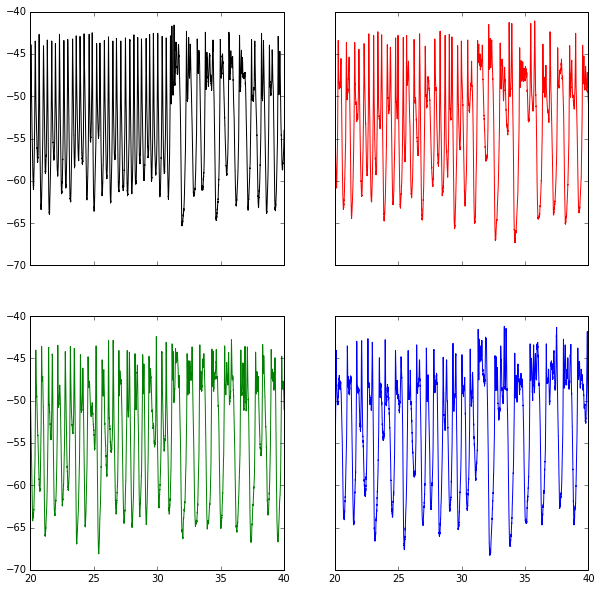

In [45]:
f, ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(10,10))
ax[0,0].plot(df.ix['sweep001']['time'][200000:400000:20], 
           df.ix['sweep001']['channel_0'][200000:400000:20], 
           color='black')
ax[0,1].plot(df.ix['sweep002']['time'][200000:400000:20], 
           df.ix['sweep002']['channel_0'][200000:400000:20], 
           color='red')
ax[1,0].plot(df.ix['sweep003']['time'][200000:400000:20], 
           df.ix['sweep003']['channel_0'][200000:400000:20], 
           color='green')
ax[1,1].plot(df.ix['sweep004']['time'][200000:400000:20], 
           df.ix['sweep004']['channel_0'][200000:400000:20], 
           color='blue')
plt.show()

## Pretty this up a little bit

In [46]:
def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
def simpleaxes(ax):
    for i, axis in enumerate(ax):
        ax[i].spines['top'].set_visible(False)
        ax[i].spines['right'].set_visible(False)
        ax[i].get_xaxis().tick_bottom()
        ax[i].get_yaxis().tick_left()

In [ ]:
for i, axis in enumerate(ax):
    print(i)
    print(axis)

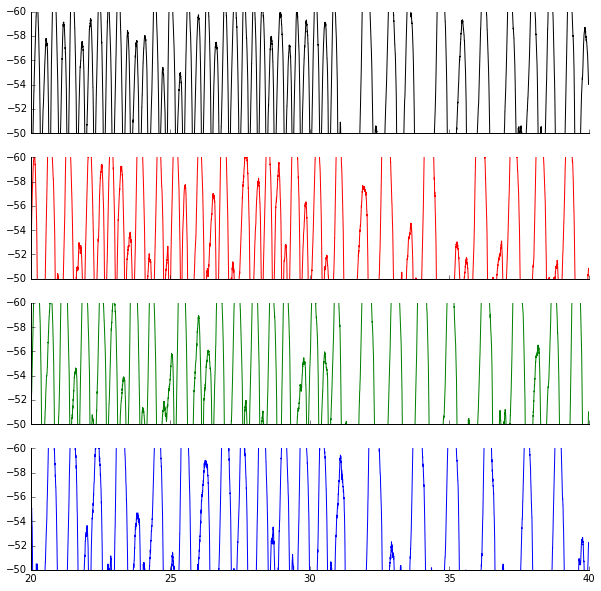

In [60]:
f, ax = plt.subplots(4, sharex=True, sharey=True, figsize=(10,10))
ax[0].plot(df.ix['sweep001']['time'][200000:400000:20], 
           df.ix['sweep001']['channel_0'][200000:400000:20], 
           color='black')
ax[1].plot(df.ix['sweep002']['time'][200000:400000:20], 
           df.ix['sweep002']['channel_0'][200000:400000:20], 
           color='red')
ax[2].plot(df.ix['sweep003']['time'][200000:400000:20], 
           df.ix['sweep003']['channel_0'][200000:400000:20], 
           color='green')
ax[3].plot(df.ix['sweep004']['time'][200000:400000:20], 
           df.ix['sweep004']['channel_0'][200000:400000:20], 
           color='blue')
# simpleaxis(ax[0])
# simpleaxis(ax[1])
# simpleaxis(ax[2])
# simpleaxis(ax[3])
ax[0].set_ylim(-50,-60)
simpleaxes(ax)
plt.show()

# Saving plots

In [49]:
# to save into current directory
# plt.savefig('<filename>.pdf')

# to save into a different directory
filepath = 'user/folder/subfolder/' + 'filename' + '.extension'
# plt.savefig(filepath)

filepath

'user/folder/subfolder/filename.extension'

# More complicated plots are possible

In [50]:
# http://matplotlib.org/users/gridspec.html
from matplotlib import gridspec

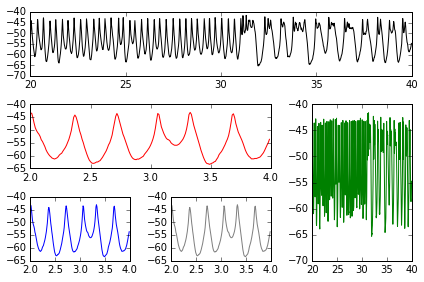

In [54]:
gs = gridspec.GridSpec(3,3)
ax1 = plt.subplot(gs[0,:]).plot(df.ix['sweep001']['time'][200000:400000:100], 
                                df.ix['sweep001']['channel_0'][200000:400000:100], 
                                color='black')
ax2 = plt.subplot(gs[1,:2]).plot(df.ix['sweep001']['time'][20000:40000:100], 
                                df.ix['sweep001']['channel_0'][20000:40000:100], 
                                color='red')
ax3 = plt.subplot(gs[1:,2]).plot(df.ix['sweep001']['time'][200000:400000:100], 
                                df.ix['sweep001']['channel_0'][200000:400000:100], 
                                color='green')
ax4 = plt.subplot(gs[2,0]).plot(df.ix['sweep001']['time'][20000:40000:100], 
                                df.ix['sweep001']['channel_0'][20000:40000:100], 
                                color='blue')
ax5 = plt.subplot(gs[2,1]).plot(df.ix['sweep001']['time'][20000:40000:100], 
                                df.ix['sweep001']['channel_0'][20000:40000:100], 
                                color='grey')
plt.tight_layout()

# Let's start making this useful
### Clean, simplify, loop

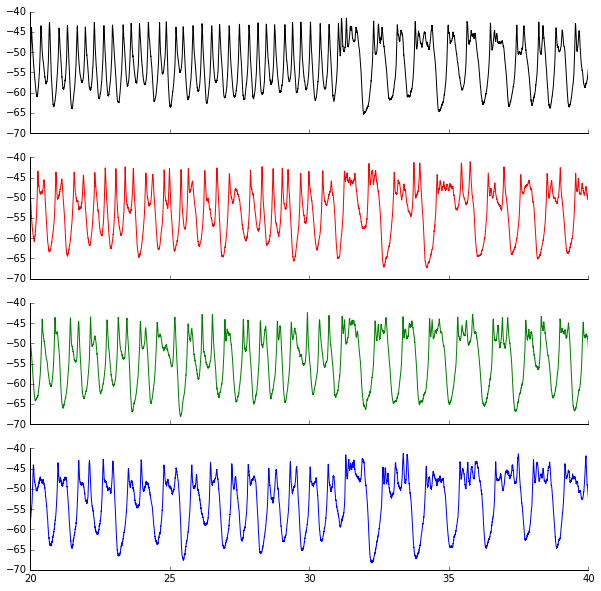

In [55]:
f, ax = plt.subplots(4, sharex=True, sharey=True, figsize=(10,10))
ax[0].plot(df.ix['sweep001']['time'][200000:400000:20], 
           df.ix['sweep001']['channel_0'][200000:400000:20], 
           color='black')
ax[1].plot(df.ix['sweep002']['time'][200000:400000:20], 
           df.ix['sweep002']['channel_0'][200000:400000:20], 
           color='red')
ax[2].plot(df.ix['sweep003']['time'][200000:400000:20], 
           df.ix['sweep003']['channel_0'][200000:400000:20], 
           color='green')
ax[3].plot(df.ix['sweep004']['time'][200000:400000:20], 
           df.ix['sweep004']['channel_0'][200000:400000:20], 
           color='blue')
simpleaxis(ax[0])
simpleaxis(ax[1])
simpleaxis(ax[2])
simpleaxis(ax[3])
plt.show()

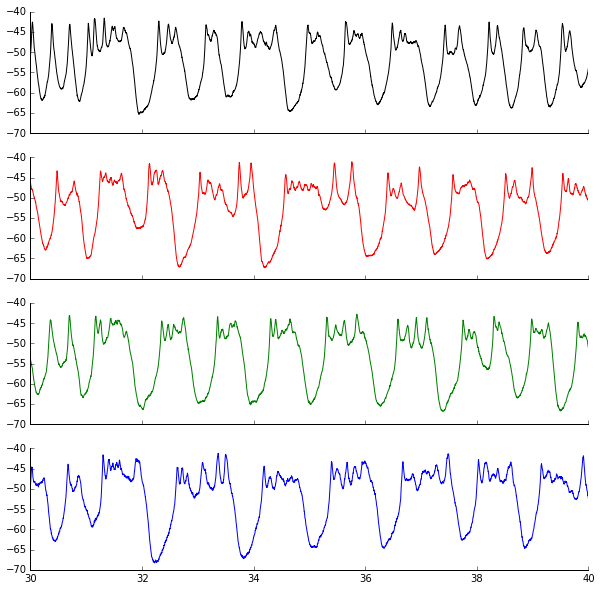

In [57]:
start = 300000
stop = 400000
step = 20
x = df.ix['sweep001']['time'][start:stop:step]
sweeps = ['sweep001', 'sweep002', 'sweep003', 'sweep004']
channel = 'channel_0'
colors = ['black', 'red', 'green', 'blue']

f, ax = plt.subplots(4, sharex=True, sharey=True, figsize=(10,10))
ax[0].plot(x, df.ix[sweeps[0]][channel][start:stop:step], color=colors[0])
ax[1].plot(x, df.ix[sweeps[1]][channel][start:stop:step], color=colors[1])
ax[2].plot(x, df.ix[sweeps[2]][channel][start:stop:step], color=colors[2])
ax[3].plot(x, df.ix[sweeps[3]][channel][start:stop:step], color=colors[3])
simpleaxes(ax)
plt.show()

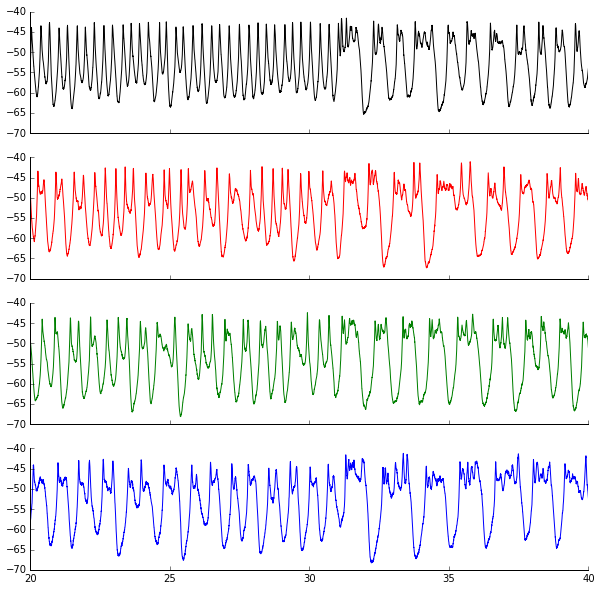

In [58]:
start = 200000
stop = 400000
step = 20
x = df.ix['sweep001']['time'][start:stop:step]
sweeps = ['sweep001', 'sweep002', 'sweep003', 'sweep004']
channel = 'channel_0'
colors = ['black', 'red', 'green', 'blue']
number_subplots = 4
# number_subplots = (len(sweeps))

f, ax = plt.subplots(number_subplots, sharex=True, sharey=True, figsize=(10,10))
for subplot in range(number_subplots):
    ax[subplot].plot(x, 
                     df.ix[sweeps[subplot]][channel][start:stop:step], 
                     color=colors[subplot])
simpleaxes(ax)
plt.show()

In [ ]:
def plotting_function(data, begin, end, *step, *other_things):
    for thing in things:
        'do the things'

# Tutorials and documentation

http://matplotlib.org/users/pyplot_tutorial.html
http://matplotlib.org/users/gridspec.html

# Load an abf or csv file and play around with it

In [ ]:
cell2 = read_abf('filename.abf')

In [ ]:
sweep_length = 100

sweep1 = cell2[:sweep_length]
sweep2 = cell2[sweep_length:sweep_length*2]
sweep3 = cell3[sweep_length*2:sweep_length*3]